1. Bibliografía:
  - El **tema 6** permitirá al alumno familiarizarse con la programación genética (PG) 
  - y, **el mencionado artículo**, con una de las variantes de la PG, denominada Evolución Gramatical (del inglés Grammatical Evolution, GE). 
  - El **capítulo 8** describe distintos mecanismos para sintonizar de forma adaptativa cada uno de los diferentes parámetros de los que consta un algoritmo evolutivo (AE). 
  - El **capítulo 10** describe la forma de hibridar un AE con otros métodos de búsqueda. 
  - Finalmente, en el **capítulo 12**, se muestran distintas estrategias para manejar la existencia de restricciones en problemas de optimización que son abordados mediante AEs.
  
2. Secciones
  - Descripción del problema a resolver
  - Método para resolverlo 
    - se debe analizar la idoneidad o no del uso de GE para resolver el problema planteado
    - se debe incluir la expresión matemática de la función de evaluación finalmente empleada
    - se debe incluir la descripción de los diferentes operadores de inicialización, variación y selección empleados
    - se debe incluir la forma de manejar las restricciones, los mecanismos de control de parámetros utilizados, así como los mecanismos de búsqueda local implementados
  - Los resultados de los distintos experimentos realizados
  - Un análisis y comparación de resultados
  - Una sección de conclusiones
  - Una descripción del código implementado. 

3. Evaluación
  - Sobre la presentación (2/10)
    - Se evaluará especialmente la claridad en la redacción de la memoria y la capacidad de síntesis.  
  - Sobre el manejo de restricciones (1/10)
      - Se valorará la originalidad del mecanismo o mecanismos usados para el manejo de restricciones.
  - Sobre la configuración del algoritmo (2/10)
    - Aquí se valorará el procedimiento seguido por el alumno a la hora de elegir la mejor configuración de parámetros del algoritmo, incluyendo la implementación de mecanismos de control de parámetros adaptativos o auto-adaptativos
  - Sobre la hibridación del algoritmo con técnicas de búsqueda local (1/10)
    - Se valorará la originalidad del mecanismo de búsqueda local utilizado.
  - Sobre el análisis y comparación de resultados, y conclusiones (4/10)
    - Se valorará la forma de interpretar y comparar los diferentes experimentos realizados.
      - Es muy importante que dicha valoración se haga siempre en términos de los índices SR, MBF, AES 
      - y cualquier otra gráfica que considere oportuna como, por ejemplo, los plots de progreso de convergencia. 
    - Finalmente, se valorará la calidad de las conclusiones obtenidas a partir de la interpretación y comparación de resultados.


# 1. Descripción del problema a resolver

Repitiendo las indicaciones dadas en el documento de la actividad, el problema consiste en implementar un algoritmo evolutivo para calcular la derivada simbólica de una función 
$$ f:X \subseteq \mathcal{R} \rightarrow \mathcal{R} $$ 

Disponemos de las siguientes dos definiciones:

> **Definición de derivada de una función en un punto**: Sea $X \subseteq \mathcal{R}$ un intervalo abierto. Diremos que $f:X \subseteq \mathcal{R} \rightarrow \mathcal{R}$ es derivable en $x_0 \in X$, denotado por $f'(x_0)$, si existe y es finito el límite:
$$
f'(x_0) = \lim \limits_{h \to 0} \frac{f(x_0+h)-f(x_0)}{h}  \tag{1}
$$

> **Definición de derivada de una función en un intervalo**: Sea $X \subseteq \mathcal{R}$ un intervalo abierto. Diremos que $f:X \subseteq \mathcal{R} \rightarrow \mathcal{R}$ es derivable en el intervalo $[a,b] \subseteq X$, si $f$ es derivable en cada uno de los puntos de dicho intervalo, es decir, si:
$$
f'(x) = \lim \limits_{h \to 0} \frac{f(x+h)-f(x)}{h}, \forall x \in [a,b]  \tag{2}
$$

Suponiendo que $f$ sea derivable en $[a,b]$, el problema de calcular la derivada lo vamos a transformar en un nuevo problema de optimización consistente en encontrar una función $g(x)$ que minimice la expresión:
$$
\min \limits_{g(x)} \frac{1}{b-a}\int_{a}^{b} error[f'(x),g(x)]dx \tag{3}
$$

dónde $f'(x)$ se calcularía utilizando la expresión $(2)$.

No obstante, el problema anterior se puede resolver de forma aproximada discretizando el intervalo de definición, es decir, cambiando el operador integral por un sumatorio:
$$
\min \limits_{g(x)} \frac{1}{N+1}\sum_{i=0}^{N} error_i[f'(a+i*h),g(a+i*h)] \tag{4}
$$
dónde $h=\frac{b-a}{N}$ es la anchura del subintervalo de muestreo para conseguir muestrear $N+1$ puntos en el intervalo $[a,b]$, y $f'(a+i*h)$ viene dado por:
$$
f'(a+i*h)=\frac{f(a+(i+1)*h) - f(a+i*h)}{h}, \forall i \in \{0,1,...,N\} \tag{5}
$$

# 2. Breve introducción a la GE

La evolución gramatical codifica un conjunto de números pseudo aleatorios **(codones)** en un cromosoma que consiste en un número variable de genes binarios de 8 bits. 

Estos números se usan para seleccionar una regla apropiada a partir de una definición de gramática con **notación Backus-Naur (BNF)**.

**Una gramática de BNF consiste en la tupla**
$$  \{N, T, P, S \} $$
dónde:
- **N** es el conjunto de no terminales, 
- **T** es el conjunto de terminales
- **P** es un conjunto de reglas de producción que mapean los elementos de N a T 
- **S** es un símbolo de inicio que es un miembro de N. 
  
Los no terminales de la gramática se mapean en los terminales de la gramática mediante la aplicación recursiva de las reglas dictadas por los valores de los genes. Al finalizar el proceso de mapeo, el código final producido (fenotipo) está formado sólo por terminales.

Por ejemplo, si consideramos esta gramática BNF:

```
N = { expr, op, pre_op } 
T = { Sin, Cos, Tan, Log, +, -, /, *, X, () } 
S = <expr>
```

Y representamos P por:

```
(1) <expr> ::= <expr> <op> <expr>     (A) 
             | ( <expr> <op> <expr> ) (B)
             | <pre-op> ( <expr> )    (C) 
             | <var>                  (D)
(2) <op> ::= + (A)  
           | - (B) 
           | / (C) 
           | * (D)
(3) <pre-op> ::= Sin (A)  
               | Cos (B) 
               | Tan (C) 
               | Log (D)
(4) <var> ::= X
```

Consideremos la regla (1):

```
(1) <expr> ::= <expr> <op> <expr> 
             | ( <expr> <op> <expr> ) 
             | <pre-op> ( <expr> ) 
             | <var>
```

En este caso, el no terminal puede producir uno de cuatro resultados diferentes, para decidir cuál utilizar nuestro sistema toma el siguiente número aleatorio disponible del cromosoma y, en este caso obtiene el módulo cuatro del número para decidir qué regal de producción toma. 

Cada vez que se tiene que tomar una decisión, se lee otro número pseudo aleatorio del cromosoma, y de esta manera, el sistema atraviesa el cromosoma.

En GE es posible que los individuos se queden sin genes durante el proceso de mapeo, y en este caso hay dos alternativas:
- La primera es declarar al individuo inválido y castigarlos con un valor de fitness adecuado
- La segunda es envolver al individuo y reutilizar los genes. Este es un enfoque bastante inusual en EAs, ya que es completamente posible que ciertos genes se usen dos o más veces. 

**Lo que es crucial, sin embargo, es que cada vez que un individuo en particular es mapeado de su genotipo a su fenotipo, se genera la misma salida. Esto se garantiza por el proceso de mapeo descrito anteriormente.**


# 3.  Método para resolverlo

## 3.1. Idoneidad de GE para resolver el problema

Nuestro problema consiste en encontrar la derivada de una función probando/evolucionando distintas combinaciones de otras dadas.

Según leemos en [grammatical-evolution.org](http://www.grammatical-evolution.org/papers/gp98/node1.html): 

> *GE has proved successful when applied to a symbolic regression problem [Ryan 98a], and finding trigonometric identities [Ryan 98b], here we apply GE to a symbolic integration problem taken from the literature [Koza 92]. This involves finding a function which is an integral of Cos(X)+2X+1. In each of these cases we take a subset of C as our target language which is described in Backus Naur Form definition. A Steady State selection mechanism [Syswerda 89] has been employed and was found to reduce the number of generations required to achieve a correct solution. Using this selection mechanism we reapplied our system to the two problems previously tackled and again found an improvement in performance for both of these problems.*

Por lo tanto, según esta referencia, parece que utilizar una técnica evolutiva basada en Evolución Gramatical podría ser la forma más indicada.

Además, teniendo en cuenta que el fundamente de la evolución gramatical se basa en definir una gramática que representa las formas válidas que pueden adoptar los individuos, y teniendo en cuenta que una función objetivo puede alcanzarse como combinación de operadores, números y otras funciones básicas, parece bastante natural que el problema de encontrar la derivadda de una función pueda abordar con técnicas de GE.

## 3.2. Expresión matemática de la función de evaluación

Primero necesitamos una función que nos permita tomar $N$ muestras del valor de la derivada de una función $f$ en un intervalo $D = [a,b]$.

In [1]:
% matplotlib inline

from math import sin, cos, exp, log


def derivative(f, D, N):
    """
    Calcula los valores aproximados de la derivada
    de f en el intervalo D tomando N muestras    
    """
    a, b = D
    h = float(b - a) / N
    return [(f(a + (i + 1) * h) - f(a + i * h)) / h for i in range(N + 1)]


# derivative(sin, [0,1], 10)

Necesitamos además poder tomar $N$ muestras de la función dada por el fenotipo compilado de un individuo en un intervalo $D=[a,b]$

In [2]:
def sample(f, D, N):
    """
    Calcula los valores de la función f
    en el intervalo D tomando N muestras    
    """
    a, b = D
    h = float(b - a) / N
    return [f(a + i * h) for i in range(N + 1)]


# sample(lambda x: cos(x), [0,1], 10)

Podemos construir además la función que determina el error cometido al considerar un fenotipo $ \text{fen}$ como la derivada de una función $f$.

La función de evaluación viene dada por la expresión (4) indicada en el enunciado de la práctica. Existen diferentes formas de calcular el error; en esta práctica vamos a utilizar el error cuadrático.


In [3]:
def mean_square_error(A, B):
    """
    Calcula el error cuadrático medio
    entre dos listas de números
    """
    squares = [(A[i] - B[i])**2 for i in range(len(A))]
    return sum(squares) / float(len(A))


# mean_square_error([4,5], [0,0])

Así por ejemplo, para el caso de seno y coseno, podemos hacer esta prueba:

In [4]:
A = derivative(sin, [0,1], 10)
B = sample(lambda x: cos(x), [0,1], 10)
print 'Error para sin´ = cos: ', mean_square_error(A, B)

Error para sin´ = cos:  0.0007595619669


Siguiendo las indicaciones del enunciado de la práctica, en lugar de implementar desde cero el código que interpretase la gramática y realizara la decodificación de los individuos, prefiero apoyarme en una librería ya existante, [ponyge](https://github.com/jmmcd/ponyge). 

De ésta extraigo sólo la funcionalidad que permite interpretar la gramática y decodificar un individuo. No utilizo la librería tal cuál está disponible en la red, sino que me quedo sólo con la parte relevante, la cual incluyo en el archivo python ponyge.py. De este modo, puedo tener un objecto que interprete una gramática dada con una simple llamada:

In [5]:
from ponyge import Grammar

G = Grammar(
    """<expr>   ::= <expr><op><expr> \
                  | (<expr><op><expr>) \
                  | <pre_op>(<expr>) \
                  | <var>
       <op>     ::= + | - | * | / 
       <pre_op> ::= sin | cos | exp | log
       <var>    ::= x | 1.0
    """,
    MAX_WRAPS=0)

Y puedo obtener el fenotipo de un individuo cualquiera llamando al método **generate** del objeto que contiene la gramática. Nótese que el método generate devuelve:
- el fenotipo del individuo de entrada si puede ser decodificado según la gramática. None en otro caso
- el número de codones que se necesitan para la decodificación

No todos los codones se corresponden con individuos que puedan ser decodificados según la gramática, según se ve en el siguiente experimento:

In [6]:
import numpy as np

i = 0
while True:
    i += 1
    ind = [np.random.randint(0, 10) for _ in range(5)]
    fen = G.generate(ind)
    if fen[0]:
        print fen, 'generated in %s rounds' % i
        break

('1.0', 2) generated in 1 rounds


Por último, haciendo uso de las funciones anteriores, podemos construir la **función de evaluación genérica**, que dadas:
- una función f
- un individuo 
- un intervalo real D=[a,b]
- y un valor N de muestreo en el intervalo

nos devuelva el fitness del individuo, o None si se produce cualquier error en la evaluación. 

Por errores de evaluación se entiende:
- el genotipo no puede traducirse en un fenotipo
- el fenotipo en el que se deserializa el genotipo se corresponde con una función no definida en el interalo

**Al devolver None en la evaluación del individuo en caso de que no sea válido, nos garantizamos que en el futuro podremos basarnos en ese valor para penalizar (ya veremos cómo) los individuos no válidos.**

In [7]:
from math import sin


def mean_sqr_fitness(f, D, N, fen):
    """
    Devuelve el fitness, visto como error cuadrático 
    medio en la aproximación a la derivada de f, 
    del fenotipo fen en el 
    intervalo D muestreado por N puntos.
    Si se produce cualquier error
    (típicamente divisiones por cero), se devuelve
    None, valor que debe interpretarse como que 
    el individuo no es válido.    
    """
    try:
        A = derivative(f, D, N)
        B = sample(fen, D, N)
        return mean_square_error(A, B)
    except:
        return None

## 3.3 Operadores de inicialización, variación y selección

Para gestionar cómodamente los individuos utilizo la clase Individual. Esta clase contiene el genoma del individuo. Llamando al método **evaluate** con una gramática y una función fitness, se calcula el fenotipo, el fenotipo compilado (función lista para ser usada) y el fitness del individuo.

In [8]:
import random
from functools import partial


class Individual(object):
    """Clase que representa los individuos"""

    def __init__(self, genome=None, CODON_SIZE=127, LENGTH=100, PENALTY=1e6):
        if genome == None:
            self.genome = [
                random.randint(0, CODON_SIZE) for _ in range(LENGTH)
            ]
        else:
            self.genome = genome
        self.phenotype = None
        self.used_codons = 0
        self.compiled_phenotype = None
        self.fitness = 1e10

    def __lt__(self, other):
        return self.fitness < other.fitness 

    def __str__(self):
        return (
            "Individual: " + str(self.phenotype) + "; " + str(self.fitness))

    def generate(self, G):
        self.phenotype, self.used_codons = G.generate(self.genome)
        return self.phenotype, self.used_codons
        
    def evaluate(self, G, fitness_f, PENALTY=1e6):
        """La función fitness_f admite como único 
        parámetro el fenotipo compilado
        """
        self.generate(G)
        if self.phenotype is None:
            self.fitness = PENALTY
        else:
            self.compiled_phenotype = eval('lambda x:' + self.phenotype)
            v = fitness_f(self.compiled_phenotype)
            self.fitness = v if v else PENALTY

Para la **selección**, la podemos hacer por torneo:

In [9]:
def tournament_selection(population, GENERATION_SIZE, TOURNAMENT_SIZE=3):
    """Selecciona por torneo."""
    winners = []
    while len(winners) < GENERATION_SIZE:
        competitors = random.sample(population, TOURNAMENT_SIZE)
        competitors.sort()
        winners.append(competitors[0])
    return winners

**Las mutaciones las realizo a nivel de codón**, no de bit, permitiendo que se parametrice la probabilidad de mutación:

In [10]:
def mutate(ind, CODON_SIZE, MUTATION_PROBABILITY=.0):
    """Muta un individuo a nivel de codón con
    probabilidad MUTATION_PROBABILITY."""
    for i in range(len(ind.genome)):
        if random.random() < MUTATION_PROBABILITY:
            ind.genome[i] = random.randint(0, CODON_SIZE)
    return ind

Y **el cruce lo realizo por un único punto**. Conviene observar que permito parametrizar que el cruce se realize o no por partes del genoma que pertenecen a la sección del mismo que es relevante en su decodificación. Igualmente, la probabilidad de que se produzca el cruza o no (que se devuelvan clones de los padres) es también parametrizable.

In [11]:
def onepoint_crossover(p_0, p_1, CROSSOVER_PROBABILITY=.1, WITHIN_USED=True):
    """Dados dos individuos, crea un hijo cruzándolos
    por punto único. Si WITHIN_USED es True, el cruce
    se produce por partes del genoma usadas en la 
    decodificación de los padres"""
    c_p_0, c_p_1 = p_0.genome, p_1.genome
    if WITHIN_USED:
        max_p_0, max_p_1 = p_0.used_codons, p_1.used_codons
    else:
        max_p_0, max_p_1 = len(c_p_0), len(c_p_1)

    pt_p_0 = random.randint(1, max_p_0)
    pt_p_1 = random.randint(1, max_p_1)
    if random.random() < CROSSOVER_PROBABILITY:
        c_0 = c_p_0[:pt_p_0] + c_p_1[pt_p_1:]
        c_1 = c_p_1[:pt_p_1] + c_p_0[pt_p_0:]
    else:
        c_0, c_1 = c_p_0[:], c_p_1[:]

    return Individual(c_0), Individual(c_1)

Y por último, el método de **reemplazo, generacional con elitismo 1 por defecto,** aunque es configurable:

In [12]:
import copy


def generational_replacement(new_pop, pop, GENERATION_SIZE, ELITE_SIZE=1):
    """Devuelve la nueva población a partir 
    de la actual y la anterior aplicando elitismo"""
    pop.sort()
    for ind in pop[:ELITE_SIZE]:
        new_pop.append(copy.copy(ind))
    new_pop.sort()
    return new_pop[:GENERATION_SIZE]

## 3.4 Implementación del algoritmo principal

Por último, podemos implementar, con todas las funcionalidades anteriores, el algoritmo que gobernará nuestro programa de evolución gramátical.

In [13]:
def go_live(f, D, N, config):
    """Ejecuta el programa de evolución gramatical
    Args:
        - f: la función cuya derivada buscamos
        - config: la configuración del algoritmo
    Devuelve el histórico de mejores individuos 
    por generación.
    """

    GRAMMAR = config['GRAMMAR']
    MAX_WRAPS = config['MAX_WRAPS']
    CODON_SIZE = config['CODON_SIZE']
    INITIAL_IND_LENGTH = config['INITIAL_IND_LENGTH']
    WORNG_IND_PENALTY = config['WORNG_IND_PENALTY']
    POPULATION_SIZE = config['POPULATION_SIZE']
    GENERATION_SIZE = config['GENERATION_SIZE']
    MAX_GENERATIONS = config['MAX_GENERATIONS']
    STOP_ON_FITNESS = config['STOP_ON_FITNESS']
    MUTATION_PROBABILITY = config['MUTATION_PROBABILITY']
    CROSSOVER_PROBABILITY = config['CROSSOVER_PROBABILITY']
    WITHIN_USED = config['WITHIN_USED']
    TOURNAMENT_SIZE = config['TOURNAMENT_SIZE']
    ELITE_SIZE = config['ELITE_SIZE']

    # Definimos la gramática y la función fitness
    G = Grammar(GRAMMAR, MAX_WRAPS)
    FITNESS = partial(mean_sqr_fitness, f, D, N)

    # Población inicial (válida)
    population = []
    while len(population) < POPULATION_SIZE:
        ind = Individual(
            CODON_SIZE=CODON_SIZE,
            LENGTH=INITIAL_IND_LENGTH,
            PENALTY=WORNG_IND_PENALTY)
        if ind.generate(G)[0] is not None:
            population.append(ind)

    # Evaluamos la población inicial
    for ind in population:
        ind.evaluate(G, FITNESS)

    population.sort()
    best = population[0]
    history = [best]

    generation = 0
    while generation < MAX_GENERATIONS \
        and STOP_ON_FITNESS < best.fitness:

        # Seleccionamos los padres
        parents = tournament_selection(
            population, GENERATION_SIZE, TOURNAMENT_SIZE=TOURNAMENT_SIZE)

        # Cruzamos los padres -> nueva población
        new_population = []
        while len(new_population) < GENERATION_SIZE:
            A, B = random.sample(parents, 2)
            C = onepoint_crossover(
                A,
                B,
                CROSSOVER_PROBABILITY=CROSSOVER_PROBABILITY,
                WITHIN_USED=WITHIN_USED)
            new_population.extend(C)

        # Mutamos la nueva población
        for ind in new_population:
            mutate(ind, CODON_SIZE, MUTATION_PROBABILITY=MUTATION_PROBABILITY)

        # Evaluamos el fitness de la nueva población
        for ind in new_population:
            ind.evaluate(G, FITNESS)

        # Procedemos al reemplazo generacional
        population = generational_replacement(
            new_population,
            population,
            GENERATION_SIZE=GENERATION_SIZE,
            ELITE_SIZE=ELITE_SIZE)

        population.sort()
        best = population[0]
        history.append(best)
        generation += 1

    return history

## 3.5 Parametrización

Una ejecución del algoritmo puede ser parametrizada utilizando un diccionario con las siguientes propiedades:
- **GRAMMAR**: un texto representando la gramática a usar
- **MAX_WRAPS**: máximo número de vueltas que se le permite dar al codón para obtener el fenotipo por el proceso de aplicar la gramática
- **CODON_SIZE**: valor máximo permitido de los enteros que componen el codón de un individuo
- **INITIAL_IND_LENGTH**: tamaño de los codones de los individuos que se generan inicialmente
- **WORNG_IND_PENALTY**: valor del fitnes (alto para que penalice) que se aplica a individuos que representa fenotipos no válidos en el contexto del problema a resolver (básicamente funciones no definidas en el intervalo)
- **POPULATION_SIZE**: tamaño de la población inicial
- **GENERATION_SIZE**: tamaño de las generaciones
- **MAX_GENERATIONS**: número máximo de generaciones que si se alcanza da por acabado el experimento
- **STOP_ON_FITNESS**: valor que determina que el experimento acaba si el mejor individuo de una generación tiene un fitness menor
- **MUTATION_PROBABILITY**: probabilidad de que se produzca la mutación en un individio
- **CROSSOVER_PROBABILITY**: probabilidad de que se produzca el cruce entre dos individuos
- **WITHIN_USED**: parámetro que si es True provoca que los cruces entre individuos se produzcan entre partes de sus codones relevantes en su construcción del fenotipo
- **TOURNAMENT_SIZE**: tamaño del torneo en el proceso de selección de los individuos de la siguiente generación
- **ELITE_SIZE**: tamaño en la selección de la élite

Por ejemplo, para probar que todo compila bien y que podemos hacer experimentos con distintas configuraciones, vamos a hacer una ejecución mínima. Nótese que la siguiente función nos ayudará a generar configuraciones basadas en una por defecto, sobre la que podremos ir modificando parámetros.

In [14]:
DEFAULT_GRAMMAR = """
<expr>   ::= <expr><op><expr> \
           | (<expr><op><expr>) \
           | <pre_op>(<expr>) \
           | <var>
<op>     ::= + | - | * | / 
<pre_op> ::= sin | cos | exp | log
<var>    ::= x | 1.0 
"""


def default_config(MAX_WRAPS=0,
                   CODON_SIZE=127,
                   INITIAL_IND_LENGTH=50,
                   WORNG_IND_PENALTY=1e6,
                   POPULATION_SIZE=100,
                   GENERATION_SIZE=100,
                   MAX_GENERATIONS=100,
                   STOP_ON_FITNESS=1e-3,
                   MUTATION_PROBABILITY=0.1,
                   CROSSOVER_PROBABILITY=0.1,
                   WITHIN_USED=True,
                   TOURNAMENT_SIZE=2,
                   ELITE_SIZE=2,
                   GRAMMAR=DEFAULT_GRAMMAR):
    return {
        'MAX_WRAPS': MAX_WRAPS,
        'CODON_SIZE': CODON_SIZE,
        'INITIAL_IND_LENGTH': INITIAL_IND_LENGTH,
        'WORNG_IND_PENALTY': WORNG_IND_PENALTY,
        'POPULATION_SIZE': POPULATION_SIZE,
        'GENERATION_SIZE': GENERATION_SIZE,
        'MAX_GENERATIONS': MAX_GENERATIONS,
        'STOP_ON_FITNESS': STOP_ON_FITNESS,
        'MUTATION_PROBABILITY': MUTATION_PROBABILITY,
        'CROSSOVER_PROBABILITY': CROSSOVER_PROBABILITY,
        'WITHIN_USED': WITHIN_USED,
        'TOURNAMENT_SIZE': TOURNAMENT_SIZE,
        'ELITE_SIZE': ELITE_SIZE,
        'GRAMMAR': DEFAULT_GRAMMAR
    }


# for h in go_live(lambda x: 2*x, [0, 1], 10, default_config()):
#     print h

El resultado ha sido:
```python
Individual: 1.0/1.0+x; 0.35
Individual: 1.0/1.0+x; 0.35
Individual: cos(sin(x))+1.0; 0.0310776536256
Individual: 1.0+1.0; 6.99217620537e-31
```

Resultado que, para ser el primero, sin optimización de parámetros ninguna, ofrece un comportamiento espectacular.


## 3.6  Manejo de restricciones y mecanismos de control de parámetros adaptativos o auto-adaptativos

Sinceramente, no he tenido tiempo de profundizar en hacer que los parámetros del algoritmo sean adaptativos. Ya en la segunda práctica trabajé esta parte con profundidad y, como digo, por cuestiones de tiempo no me veo capaz de incluirlo en ésta.

En cuanto al manejo de restricciones, como he indicado más arriba, procedo de dos modos:
- en la población inicial me aseguro de que todos los individuos son válidos, es decir, pueden decodificarse en un fenotipo válido
- en el cálculos del fitness de los individuos, aquellos cuyo fenotipo acaba siendo una función no definida en el intervalo de estudio, son penalizados con un fitness muy alto por lo que están condenados a la extinción

# 4 Utilidades de interpretación de resultados

## 4.1 Plots de progreso en escala logarítmica

En primer lugar es necesario poder dibujar las gráficos de progreso de la convergencia a la solución. 

Nótese el uso de la **escala logarítmica** para que las diferencias entre los individuos de las primeras generaciones (típicamente muy lejanos al óptimo) y los de las últimas no aberren los gráficos.

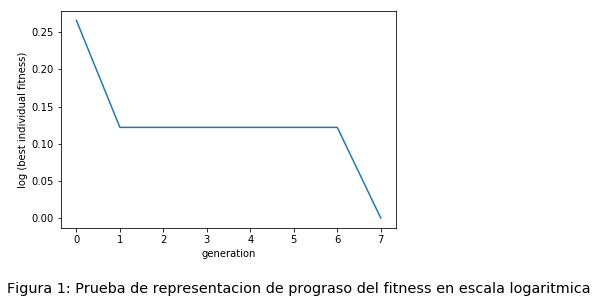

In [15]:
import matplotlib.pyplot as plt
import math


def log_plot(individuals, text):
    """ Dibuja el logaritmo del fitness de una 
    lista de individuos."""
    plt.plot([math.log(i.fitness + 1) for i in individuals])
    plt.ylabel('log (best individual fitness)')
    plt.xlabel('generation')
    plt.figtext(0, -.1, text, fontsize='x-large')
    plt.show()


log_plot(
    go_live(lambda x: x**2, [0, 1], 100, default_config()),
    'Figura 1: Prueba de representacion de prograso del fitness en escala logaritmica'
)

# 4.2 Índices SR, MBF y AES

In [16]:
import numpy

def SR(histories, umbral_exito=1e-6):
    """ 
    Calcula el porcentaje de experimentos que 
    acaban con éxito, teniendo en cuenta el 
    parámetro umbral_exito.
    """
    exitos = filter(lambda h: h[-1].fitness < umbral_exito, histories)
    return float(len(exitos)) / len(histories)


def AES(histories, GENERATION_SIZE, umbral_exito=1e-6):
    """
    Calcula el número medio de evaluaciones 
    y su desviación típica para aquellos 
    experimentos que fueron exitosos.
    """ 
    exitos = filter(lambda h: h[-1].fitness < umbral_exito, histories)    
    totals = []
    for e in exitos:
        index = 0
        while umbral_exito < e[index].fitness:
            index += 1
        totals.append(index * GENERATION_SIZE)
    return np.mean(totals), np.std(totals)

def MBF(histories):
    """
    Calcula la media y la desciación típica 
    del fitness del mejor individuo encontrado
    """
    A = [h[-1].fitness for h in histories]
    return np.mean(A), np.std(A)

Y añado además una función que me facilita la presentación de resultados en forma de tabla:

In [18]:
import pandas as pd
pd.set_option('display.notebook_repr_html', True)

# def _repr_latex_(self):
#     return self.to_latex()
# pd.DataFrame._repr_latex_ = _repr_latex_

pd.DataFrame._repr_latex_ = lambda x: x._repr_latex_


def render_metrics(histories, GENERATION_SIZE=None, umbral_exito=None):
    """
    Dibuja de forma tabulada las métricas de 
    rendimiento de una lista de experimentos
    dados por el histórico de mejores individuos.
    """
    data = {'MBF': MBF(histories)}
    if umbral_exito is not None:
        data['SR'] = SR(histories, umbral_exito=umbral_exito)
        if GENERATION_SIZE is not None:
            data['AES'] = AES(histories,
                              umbral_exito=umbral_exito,
                              GENERATION_SIZE=GENERATION_SIZE)
    return pd.DataFrame(data)

In [ ]:

render_metrics(histories, GENERATION_SIZE=100, umbral_exito=1e-2)